# DScover 가이드 프로젝트 E조 최종 코드


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train= pd.read_csv('./data/train.csv')
test= pd.read_csv('./data/test.csv')
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,0
1,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,0
2,73,Private,29778,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,37,United-States,0
3,56,Self-emp-inc,105582,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,1
4,53,Private,167065,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


## 1. 결측치 확인

- train과 test의 현재 존재하는 결측치를 확인합니다. 
- 결측치의 특성을 분석하여 처리 계획을 수립합니다. 

In [3]:
# train의 결측치
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

범주형 데이터인, workclass, occupation, native.country에서의 결측치가 발견되었음

In [4]:
# test의 결측치
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

test는 결측치가 발견되지 않음

### occupation 결측치 분석
- 직업이 없는 사람 중, 고등학교 졸업자의 비율이 높음이 발견

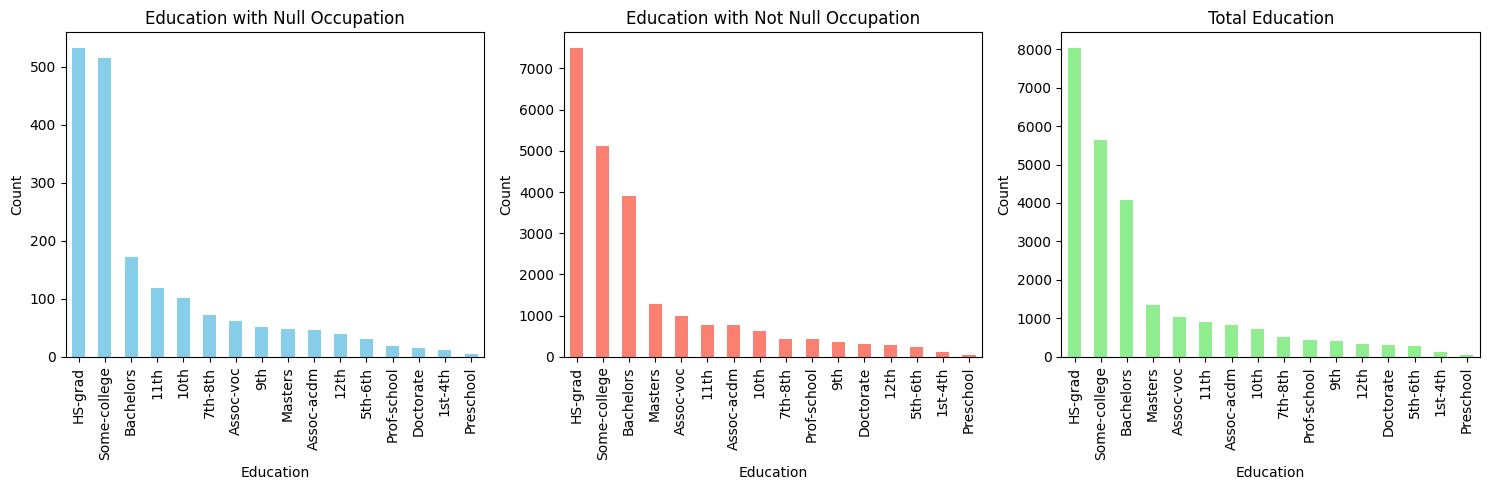

In [5]:
import matplotlib.pyplot as plt

# 데이터 준비
null_occupation = train[train['occupation'].isnull()]['education'].value_counts()
notnull_occupation = train[train['occupation'].notnull()]['education'].value_counts()
total_education = train['education'].value_counts()

# 플롯 설정
plt.figure(figsize=(15, 5))

# 첫 번째 그래프: occupation 결측치인 사람들의 education
plt.subplot(1, 3, 1)  # 1행 3열의 첫 번째 그래프
null_occupation.plot(kind='bar', color='skyblue')
plt.title('Education with Null Occupation')
plt.xlabel('Education')
plt.ylabel('Count')

# 두 번째 그래프: occupation이 있는 사람들의 education
plt.subplot(1, 3, 2)  # 1행 3열의 두 번째 그래프
notnull_occupation.plot(kind='bar', color='salmon')
plt.title('Education with Not Null Occupation')
plt.xlabel('Education')
plt.ylabel('Count')

# 세 번째 그래프: 전체 education
plt.subplot(1, 3, 3)  # 1행 3열의 세 번째 그래프
total_education.plot(kind='bar', color='lightgreen')
plt.title('Total Education')
plt.xlabel('Education')
plt.ylabel('Count')

# 레이아웃 조정 및 플롯 표시
plt.tight_layout()
plt.show()


occupation이 Null인 사람의 교육 수준이 HS-grad인 것이 특별히 다른 점으로 확인되지 않는다. (다른 분포와 유사하다)

마지막 확인은 hours.per.week이다. hours.per.week가 0이라면 no-job을, hours.per.week가 있다면 part-time-job으로 채운다

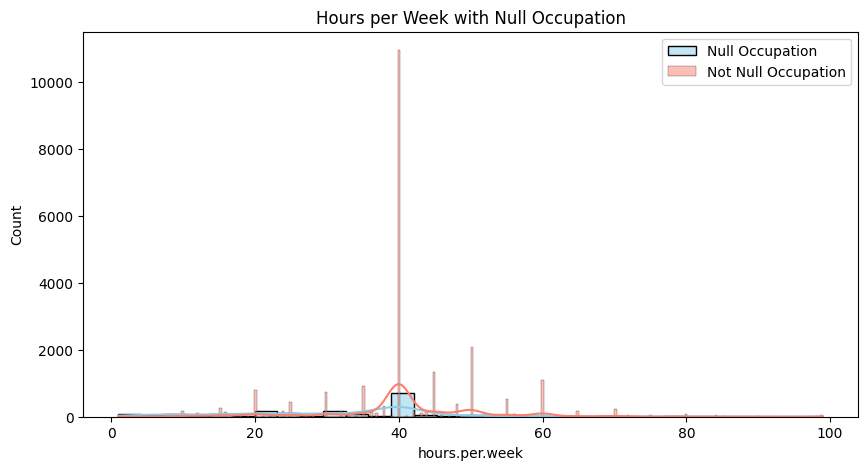

In [6]:
# occupation이 결측치인 사람들의 hours.per.week 시각화
plt.figure(figsize=(10, 5))
sns.histplot(train[train['occupation'].isnull()]['hours.per.week'], color='skyblue', kde=True, label='Null Occupation')
sns.histplot(train[train['occupation'].notnull()]['hours.per.week'], color='salmon', kde=True, label='Not Null Occupation')
plt.title('Hours per Week with Null Occupation')
plt.legend()
plt.show()


In [7]:
# occupation 결측치 채우기 (no-job으로 채우기)
train['occupation'].fillna('no-job', inplace=True)
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
# occupation 고유값 확인
train['occupation'].unique()

array(['Exec-managerial', 'Other-service', 'Machine-op-inspct',
       'Transport-moving', 'Prof-specialty', 'Craft-repair',
       'Adm-clerical', 'Handlers-cleaners', 'Sales', 'Farming-fishing',
       'Protective-serv', 'Tech-support', 'Priv-house-serv',
       'Armed-Forces', 'no-job'], dtype=object)

In [9]:
# 'no-job' 중 40시간 이상 근무하는 사람은 'Part-time'으로 교체
train.loc[(train['occupation'] == 'no-job') & (train['hours.per.week'] >= 40), 'occupation'] = 'Part-time'

# 'no-job' 중 40시간 미만 근무하는 사람은 'No-job'으로 명시적으로 설정
train.loc[(train['occupation'] == 'no-job') & (train['hours.per.week'] < 40), 'occupation'] = 'No-job'


In [10]:
# occupation의 고유값 확인
train['occupation'].value_counts()

Prof-specialty       3115
Exec-managerial      3090
Craft-repair         3084
Adm-clerical         2829
Sales                2798
Other-service        2489
Machine-op-inspct    1510
Transport-moving     1197
Handlers-cleaners    1039
No-job                944
Part-time             899
Farming-fishing       731
Tech-support          688
Protective-serv       481
Priv-house-serv       120
Armed-Forces            6
Name: occupation, dtype: int64

### native.country의 결측치 처리

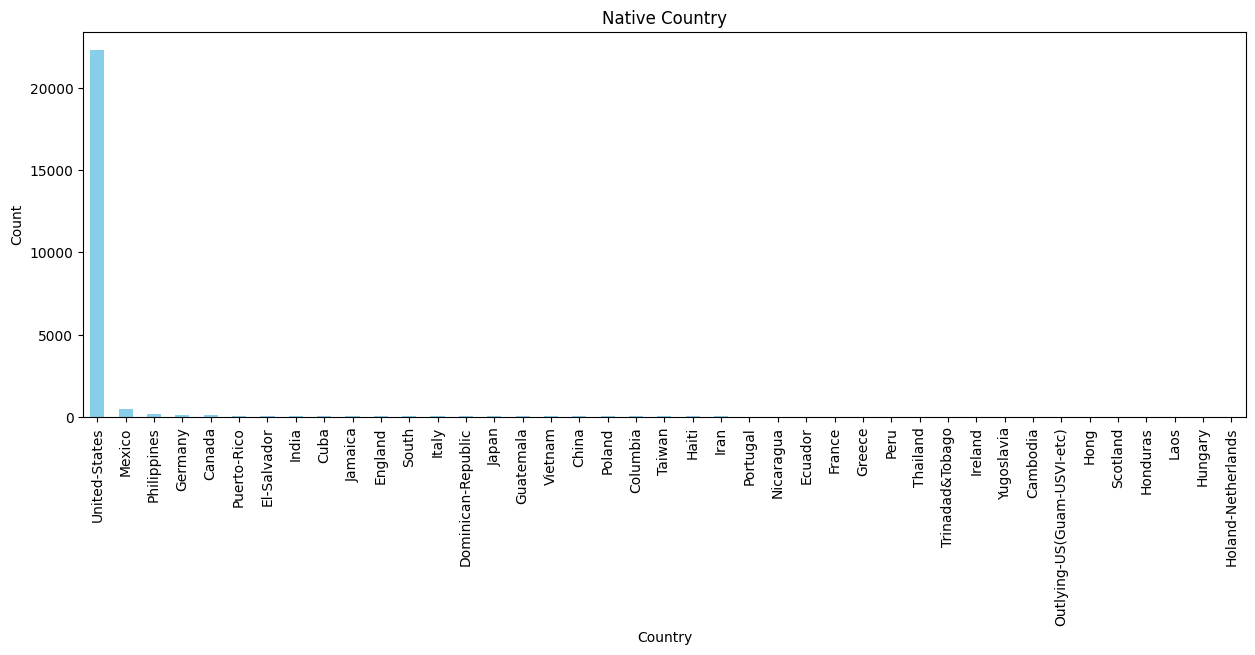

In [11]:
# native.country 데이터 시각화
plt.figure(figsize=(15, 5))
train['native.country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Native Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

시각화 결과, 미국에 대한 데이터가 많음. 따라서 최빈값인 미국으로 결측치를 채움

In [12]:
# native.country 결측치 채우기 (United-States로 채우기)
train['native.country'].fillna('United-States', inplace=True)
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

### workclass의 결측치 처리


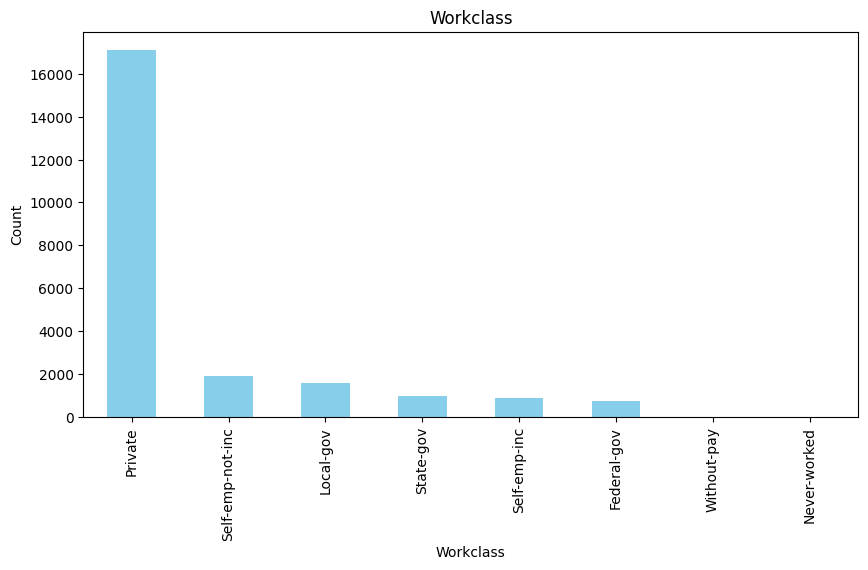

In [13]:
# workclass 데이터 시각화
plt.figure(figsize=(10, 5))
train['workclass'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


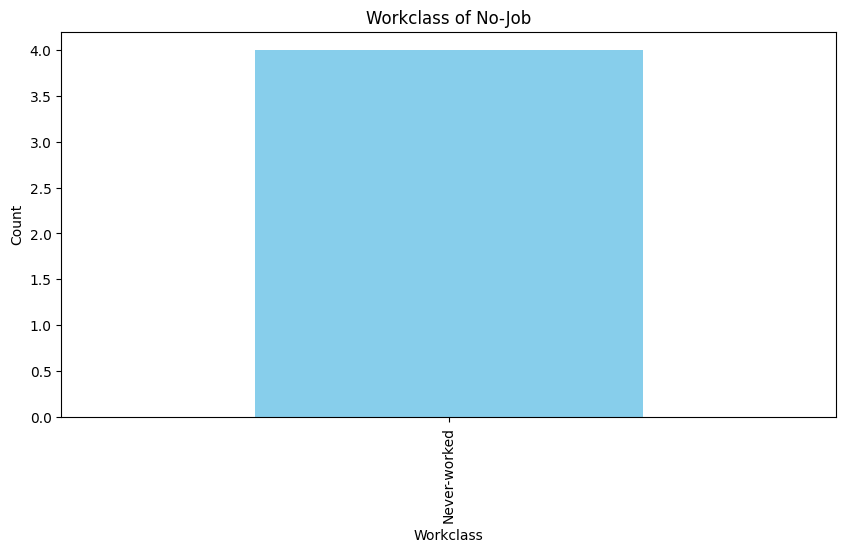

In [14]:
# no-job인 사람들의 workclass 시각화
plt.figure(figsize=(10, 5))
train[train['occupation'] == 'No-job']['workclass'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Workclass of No-Job')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

직업이 없는 사람은 모두 Never-worked이다. 

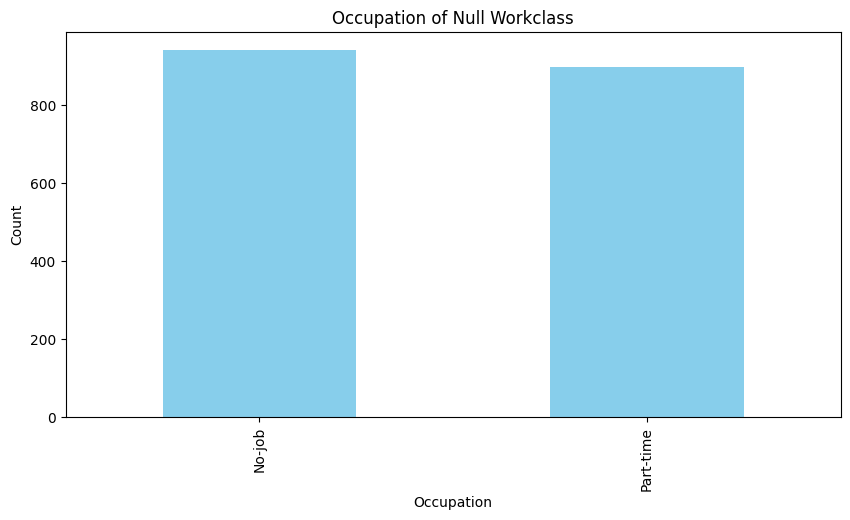

In [15]:
# workclass가 결측치인 사람들의 직업 시각화
plt.figure(figsize=(10, 5))
train[train['workclass'].isnull()]['occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Occupation of Null Workclass')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

따라서 Workclass의 결측치는 일하지 않은 사람들이라 할 수 있다.

In [16]:
# workclass 결측치 채우기 (occupation이 'No-job'인 경우 'Never-worked'으로 채우기, occupation이 'Part-time'인 경우 'Private'으로 채우기)
train.loc[(train['workclass'].isnull()) & (train['occupation'] == 'No-job'), 'workclass'] = 'Never-worked'
train.loc[(train['workclass'].isnull()) & (train['occupation'] == 'Part-time'), 'workclass'] = 'Private'


## 2. 이상치 확인
- 범주형 데이터에서 논리적인 이상치 발견 (각 행의 관계)
- 연속형 데이터에서의 이상치 처리 


### Wife인데 성별이 남자인 경우 발견

In [17]:
# Wife인데 성별이 남자인 경우 
train[(train['relationship'] == 'Wife') & (train['sex']=='Male')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
14274,29,Private,350162,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,1
24644,36,Private,74791,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,United-States,0


이 당시에는 미국의 동성혼 개념이 없었다. (1994년)

| 2003년 매사추세츠 주법원이 동성 결혼을 허용하는 판결을 내리면서 처음으로 동성결혼 제도가 도입

남자/여자를 판단할 수 있는 근거가 없으므로 제거하였다.

In [18]:
train.drop(train[(train['relationship'] == 'Wife') & (train['sex'] == 'Male')].index, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25018 entries, 0 to 25019
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25018 non-null  int64 
 1   workclass       25018 non-null  object
 2   fnlwgt          25018 non-null  int64 
 3   education       25018 non-null  object
 4   education.num   25018 non-null  int64 
 5   marital.status  25018 non-null  object
 6   occupation      25018 non-null  object
 7   relationship    25018 non-null  object
 8   race            25018 non-null  object
 9   sex             25018 non-null  object
 10  capital.gain    25018 non-null  int64 
 11  capital.loss    25018 non-null  int64 
 12  hours.per.week  25018 non-null  int64 
 13  native.country  25018 non-null  object
 14  income          25018 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.1+ MB


### Widowed인데 unmarried인 경우 발견

In [19]:
train[(train['marital.status'] == 'Widowed') & (train['relationship'] == 'Unmarried')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
73,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,0
192,33,Self-emp-inc,128016,HS-grad,9,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,0
206,42,Private,153160,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,0,0,40,United-States,0
284,59,Federal-gov,243612,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,0
465,28,Private,129460,10th,6,Widowed,Adm-clerical,Unmarried,White,Female,0,2238,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24573,81,Never-worked,106765,Some-college,10,Widowed,No-job,Unmarried,White,Female,0,0,4,United-States,0
24666,46,Private,228620,11th,7,Widowed,Part-time,Unmarried,Black,Female,0,0,40,United-States,0
24695,59,Private,220783,10th,6,Widowed,Part-time,Unmarried,White,Female,0,0,40,United-States,0
24929,41,Never-worked,252127,Some-college,10,Widowed,No-job,Unmarried,Black,Female,0,0,20,United-States,0


In [20]:
train['relationship'].value_counts()

Husband           10017
Not-in-family      6354
Own-child          3964
Unmarried          2666
Wife               1240
Other-relative      777
Name: relationship, dtype: int64

현재 미망인을 직접적으로 표현할 수 있는 열이 없음. 따라서 'Widowed' 를 새롭게 추가

In [21]:
train.loc[(train['marital.status'] == 'Widowed') & (train['relationship'] == 'Unmarried'), 'relationship'] = 'Widowed'
test.loc[(test['marital.status'] == 'Widowed') & (test['relationship'] == 'Unmarried'), 'relationship'] = 'Widowed'

In [22]:
train['relationship'].value_counts()

Husband           10017
Not-in-family      6354
Own-child          3964
Unmarried          2366
Wife               1240
Other-relative      777
Widowed             300
Name: relationship, dtype: int64

## 3. 피처-엔지니어링

### (1) native.country
데이터 차원이 크다. 따라서 United-States와 아닌 국가로 나누었다. 

In [23]:
train['native.country'] = train['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')
train['native.country'].value_counts()

United-States    22861
Other             2157
Name: native.country, dtype: int64

In [24]:
test['native.country'] = test['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')

### (2) capital.loss와 capital.gain
이 둘을 합한 열인 capital.diff을 만들어, 복잡도를 낮추었다.

In [25]:
# capital.gain, capital.loss 합친열, capital.diff 추가
train['capital.diff'] = train['capital.gain'] - train['capital.loss']
test['capital.diff'] = test['capital.gain'] - test['capital.loss']

In [26]:
# capital.gain, capital.loss 제거
train.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)
test.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)

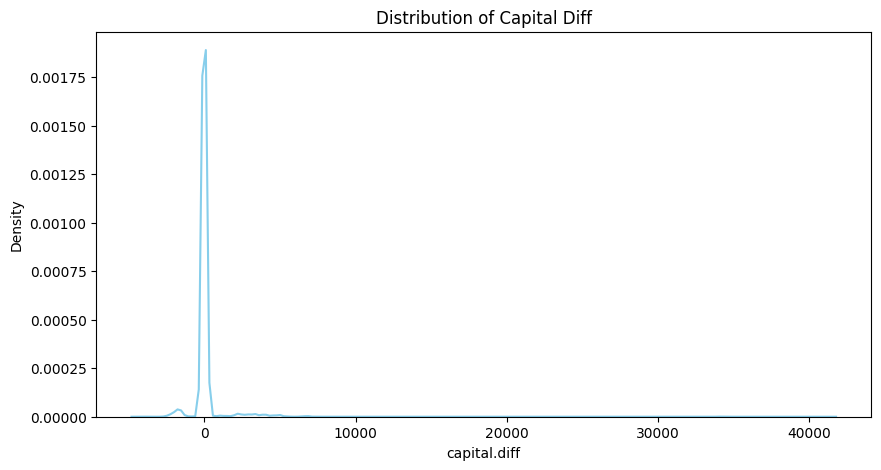

In [27]:
# capital.diff 시각화
plt.figure(figsize=(10, 5))
sns.kdeplot(train[train['income'] == 0]['capital.diff'], color='skyblue', label='0')
plt.title('Distribution of Capital Diff')
plt.show()

### (3) fnlwgt  분석
: 일련의 관측 결과를 바탕으로 인구조사국이 부여하는 개인의 가중치

즉 fnlwgt은 해당 샘플의 대표성을 나타낸다고 볼 수 있다. 

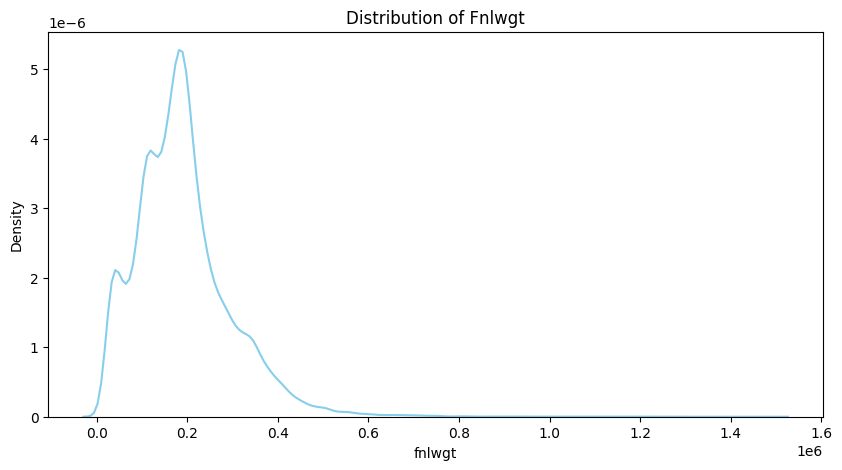

In [28]:
plt.figure(figsize=(10, 5))
sns.kdeplot(train['fnlwgt'], color='skyblue', label='0')
plt.title('Distribution of Fnlwgt')
plt.show()

In [29]:
# fnlwgt 25% 별로 나누어 fnlwgt_encoded 열 추가
train['fnlwgt_encoded'] = pd.qcut(train['fnlwgt'], q=4, labels=False)
test['fnlwgt_encoded'] = pd.qcut(test['fnlwgt'], q=4, labels=False)

학습에는 사용하지 않고, 후보정에 사용

In [30]:
train_fnlwgt = train['fnlwgt']
test_fnlwgt = test['fnlwgt']

In [31]:
# fnlwgt.drop 
train.drop('fnlwgt', axis=1, inplace=True)
test.drop('fnlwgt', axis=1, inplace=True)

### (4) education과 education.num의 관계

In [32]:
# education의 고유값
train['education'].unique()


array(['Bachelors', 'HS-grad', 'Some-college', '11th', 'Masters', '9th',
       '12th', 'Assoc-acdm', '10th', 'Doctorate', 'Assoc-voc', '7th-8th',
       '5th-6th', '1st-4th', 'Prof-school', 'Preschool'], dtype=object)

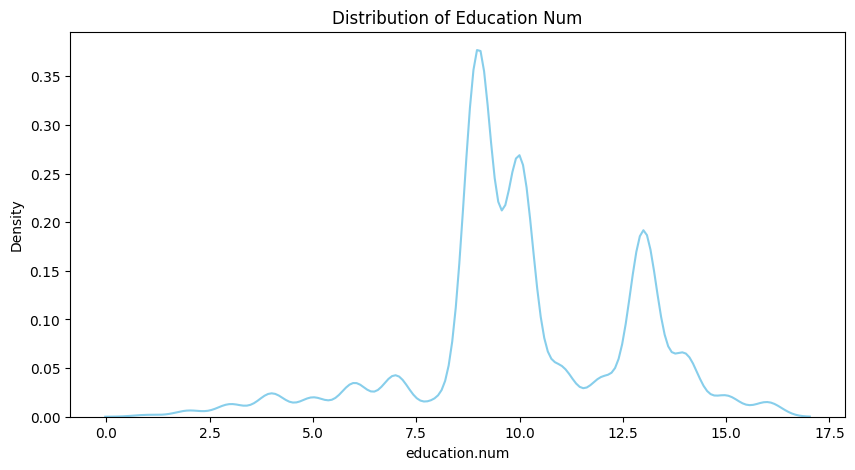

In [33]:
# education.num 시각화
plt.figure(figsize=(10, 5))
sns.kdeplot(train['education.num'], color='skyblue', label='0')
plt.title('Distribution of Education Num')
plt.show()

education과 education.num은 동일한 의미를 담고 있다.따라서 더 구체적인 정보를 제공하는 열을 그대로 두고 education 열 삭제

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25018 entries, 0 to 25019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25018 non-null  int64 
 1   workclass       25018 non-null  object
 2   education       25018 non-null  object
 3   education.num   25018 non-null  int64 
 4   marital.status  25018 non-null  object
 5   occupation      25018 non-null  object
 6   relationship    25018 non-null  object
 7   race            25018 non-null  object
 8   sex             25018 non-null  object
 9   hours.per.week  25018 non-null  int64 
 10  native.country  25018 non-null  object
 11  income          25018 non-null  int64 
 12  capital.diff    25018 non-null  int64 
 13  fnlwgt_encoded  25018 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.9+ MB


### (5) 안정성 기반 인코딩

In [35]:
# occupation 라벨링
# 안정성 라벨링
stability_labels = {
    'Exec-managerial': 4,
    'Prof-specialty': 4,
    'Tech-support': 3,
    'Sales': 5,
    'Adm-clerical': 3,
    'Other-service': 5,
    'Craft-repair': 4,
    'Machine-op-inspct': 5,
    'Farming-fishing': 3,
    'Protective-serv': 4,
    'Transport-moving': 4,
    'Priv-house-serv': 3,
    'Armed-Forces': 1,
    'Handlers-cleaners': 3,
    'Part-time': 0.5,
    'No-job':0  # Undefined
}

# 안정성 라벨링 적용 
train['occupation'] = train['occupation'].apply(lambda x: stability_labels[x] if x in stability_labels else 0)
test['occupation'] = test['occupation'].apply(lambda x: stability_labels[x] if x in stability_labels else 0)


In [36]:
train.drop('education', axis=1, inplace=True)
test.drop('education', axis=1, inplace=True)

### (6) Binary 인코딩 가능한 열
- 성별


In [37]:
# 성별 binary encoding (Male = 0, Female = 1)
# train
train['sex'] = train['sex'].map({'Male': 0, 'Female': 1})

# test
test['sex'] = test['sex'].map({'Male': 0, 'Female': 1})

### (7) martial.status와 relationship을 이용한 커스텀 인코딩

여기 있는 결혼 상태에 대한 카테고리 각각의 의미를 한국어로 번역:

1. **Divorced**: 이혼한 사람
2. **Never-married**: 결혼한 적 없는 사람 (미혼)
3. **Widowed**: 배우자가 사망한 사람 (사별)
4. **Married-civ-spouse**: 시민 결혼을 한 사람 (법적인 배우자가 있는 기혼자)
5. **Married-spouse-absent**: 배우자가 부재 중인 기혼자 (배우자가 같이 살지 않는 경우)
6. **Separated**: 별거 중인 사람 (법적으로 결혼 상태는 유지되지만 별거 중)
7. **Married-AF-spouse**: 군인 배우자를 둔 기혼자 (Armed Forces에 속한 배우자와 결혼한 경우)


In [38]:
# marital.status  고유값
train['marital.status'].unique()

array(['Divorced', 'Never-married', 'Widowed', 'Married-civ-spouse',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse'],
      dtype=object)

현재 같이 사는 경우와 안 사는 경우로 나누어 커스텀 인코딩

In [39]:
custom_encoding = {
    'Divorced': 0,                # 이혼한 사람 (같이 살지 않음)
    'Never-married': 0,            # 결혼한 적 없는 사람 (같이 살지 않음)
    'Widowed': 0,                  # 사별한 사람 (같이 살지 않음)
    'Married-civ-spouse': 1,       # 시민 결혼을 한 사람 (같이 삶)
    'Married-spouse-absent': 0,    # 배우자가 부재 중인 기혼자 (같이 살지 않음)
    'Separated': 0,                # 별거 중인 사람 (같이 살지 않음)
    'Married-AF-spouse': 1         # 군인 배우자를 둔 기혼자 (같이 삶, 배우자가 주둔지에 있을 경우)
}

# train
train['marital.status'] = train['marital.status'].map(custom_encoding)
# test
test['marital.status'] = test['marital.status'].map(custom_encoding)

## One-Hot 인코딩

In [40]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [41]:
# test와 train 열 일치 align
train, test = train.align(test, join='inner', axis=1)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25018 entries, 0 to 25019
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           25018 non-null  int64  
 1   education.num                 25018 non-null  int64  
 2   marital.status                25018 non-null  int64  
 3   occupation                    25018 non-null  float64
 4   sex                           25018 non-null  int64  
 5   hours.per.week                25018 non-null  int64  
 6   income                        25018 non-null  int64  
 7   capital.diff                  25018 non-null  int64  
 8   fnlwgt_encoded                25018 non-null  int64  
 9   workclass_Federal-gov         25018 non-null  uint8  
 10  workclass_Local-gov           25018 non-null  uint8  
 11  workclass_Private             25018 non-null  uint8  
 12  workclass_Self-emp-inc        25018 non-null  uint8  
 13  w

## 5. 모델 선정
-LightGBM

전처리 데이터를 그대로 학습 시킨 결과의 정확도: 0.8699111523670601

In [43]:
from lightgbm import LGBMClassifier

X_train = train.drop('income', axis=1)
y_train = train['income']

X_test = test.drop('income', axis=1)
y_test = test['income']

lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.005)
lgbm.fit(X_train, y_train)

# 예측
pred = lgbm.predict(X_test)

# accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(accuracy)

/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd

[LightGBM] [Info] Number of positive: 5942, number of negative: 19076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 25018, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237509 -> initscore=-1.166385
[LightGBM] [Info] Start training from score -1.166385
0.8623524731467975


/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/sundo/lib/python3.10/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


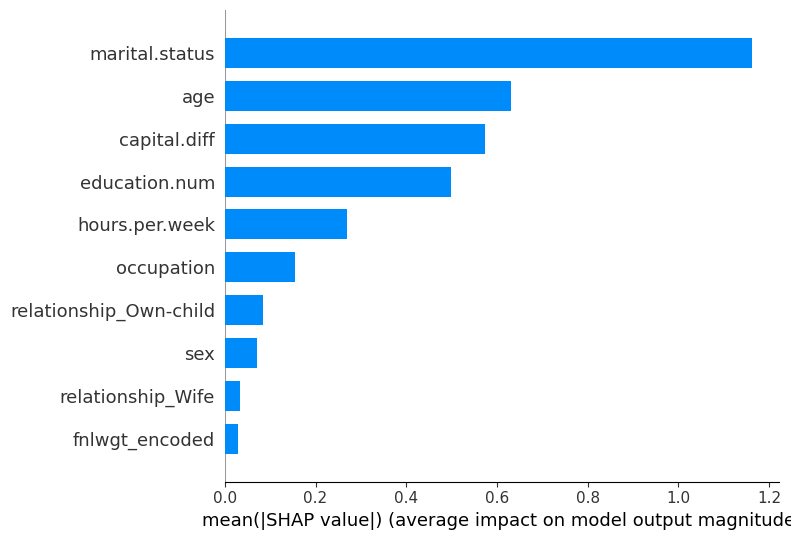

In [44]:
# SHAP
import shap

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=10) 